In [1]:
from datetime import datetime
print(f'Päivitetty {datetime.now().date()} / Aki Taanila')

Päivitetty 2023-12-08 / Aki Taanila


# Matplotlib - osa 3
## Histogrammi

Tämä on jatkoa sarjan kahdelle edelliselle osalle:

* https://nbviewer.jupyter.org/github/taanila/kaaviot/blob/master/matplotlib1.ipynb
* https://nbviewer.jupyter.org/github/taanila/kaaviot/blob/master/matplotlib2.ipynb

**Seaborn** on matplotlibin päälle rakennettu paketti, joka tekee monista vaikeista asioista helppoja. Tässä muistiossa käytän histogrammien tekemiseen seaborn-kirjastoa.

Käytän seuraavissa akselin jakoviivojen (ticks) sijoittelun ja ulkoasun tuunausta **matplotlib.ticker**-paketin toiminnoilla vaikka ilman tätäkin saa ihan riittävän hyvät kaaviot.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker    # Arvoakselien tuunaukseen
sns.set_style('whitegrid')

In [3]:
df = pd.read_excel('https://taanila.fi/data1.xlsx')
df.head()

,nro,sukup,ikä,perhe,koulutus,palveluv,palkka,johto,työtov,työymp,palkkat,työteht,työterv,lomaosa,kuntosa,hieroja
0,1,1,38,1,1.0,22.0,3587,3,3.0,3,3,3,NaN,NaN,NaN,NaN
1,2,1,29,2,2.0,10.0,2963,1,5.0,2,1,3,NaN,NaN,NaN,NaN
2,3,1,30,1,1.0,7.0,1989,3,4.0,1,1,3,1.0,NaN,NaN,NaN
3,4,1,36,2,1.0,14.0,2144,3,3.0,3,3,3,1.0,NaN,NaN,NaN
4,5,1,24,1,2.0,4.0,2183,2,3.0,2,1,2,1.0,NaN,NaN,NaN


## Histogrammi

Histogrammia käytetään määrällisen muuttujan luokitellun jakauman esittämiseen. Histogrammissa pylväät ovat kiinni toisissaan. Käytän seuraavassa seabornin **histplot**-funktiota. 

Seuraavassa tallennan kaavion muuttujan **ax1** arvoksi, jotta voin viitata kaavioon käyttäessäni **set_major_locator**-toimintoa.

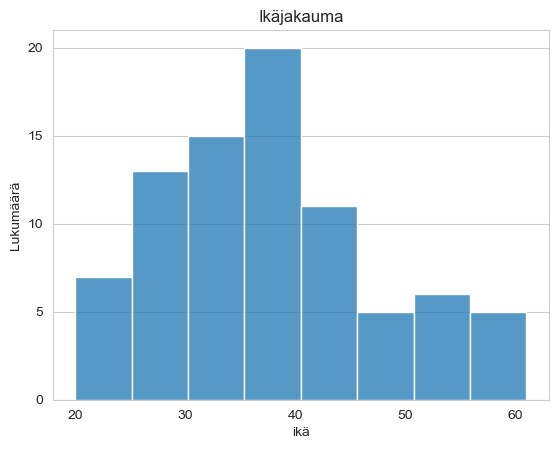

In [4]:
ax1 = sns.histplot(data=df, x='ikä')

plt.title('Ikäjakauma')
plt.ylabel('Lukumäärä')
plt.grid(axis = 'x')

# Tuunaan y-akselin näyttämään arvot viiden välein
ax1.yaxis.set_major_locator(ticker.MultipleLocator(5))

Seuraavassa viimeistellympi histogrammi, jossa määrään käytettäväksi kuutta luokkaa (**bins = 6**).

Lukumäärien sijasta arvoakselilla on prosentit (`stat='percent'`)

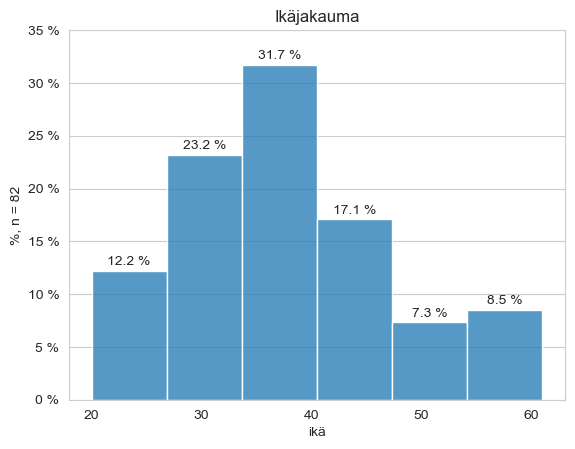

In [5]:
ax2 = sns.histplot(data=df, x='ikä', bins=6, stat='percent')

plt.title('Ikäjakauma')
n = df['ikä'].count()    # Ikään liittyvien havaintojen lukumäärä
plt.ylabel(f'%, n = {str(n)}')
plt.grid(axis='x')
plt.ylim(0, 35)

for bar_container in ax2.containers:
    ax2.bar_label(bar_container, padding=2, fmt='{:.1f} %')

ax2.yaxis.set_major_locator(ticker.MultipleLocator(5))
# %-merkit y-akselin lukujen perään
ax2.yaxis.set_major_formatter(ticker.FuncFormatter('{:.0f} %'.format))

* Voin määrittää luokkarajat itse. Tarvittaessa voin käyttää myös epätasavälisiä luokkia. 
* Havainnollisuuden parantamiseksi asetan x-akselin jakoviivat luokkarajojen kohdille (**plt.xticks(bins)**).
* Huomaa, että epätasavälistä luokittelua käytettäessä pylvään leveys riippuu luokan leveydestä.

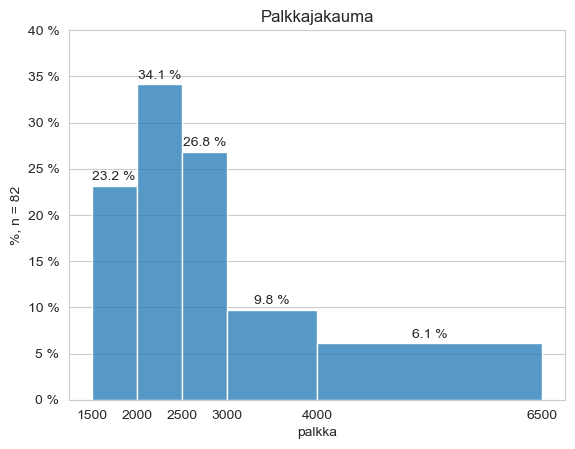

In [6]:
n = df['palkka'].count()
bins = [1500, 2000, 2500, 3000, 4000, 6500]    # Luokkien ylärajat sisältyvät luokkaan

ax3 = sns.histplot(data=df, x='palkka', bins=bins, stat='percent')

plt.title('Palkkajakauma')
plt.ylabel(f'%, n = {str(n)}')
plt.xticks(bins)
plt.grid(axis='x')
plt.ylim(0, 40)

for bar_container in ax3.containers:
    ax3.bar_label(bar_container, padding=2, fmt='{:.1f} %')

ax3.yaxis.set_major_locator(ticker.MultipleLocator(5))
ax3.yaxis.set_major_formatter(ticker.FuncFormatter('{:.0f} %'.format))

## Lisätietoa

Seuraava osa https://nbviewer.jupyter.org/github/taanila/kaaviot/blob/master/matplotlib4.ipynb käsittelee värien ja värikarttojen käyttöä